In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [3]:
# Load the data

data = pd.read_csv(r"C:\Users\thoma\OneDrive\Desktop\pga08 0nline\deep learning\fake_job_postings.csv")

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
data.shape

(17880, 18)

In [5]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# drop the irrelevant columns
data.drop(['job_id', 'salary_range'], axis = 1, inplace = True)

In [8]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
data.dtypes

title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

## Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x7f3dc21ffc10>,
 [Text(-1.1861351897986643, 0.18188818411674518, 'Real'),
  Text(1.1861351812838625, -0.1818882396437407, 'Fake')],
 [Text(-0.6919121940492208, 0.106101440734768, '95.2%'),
  Text(0.691912189082253, -0.1061014731255154, '4.8%')])

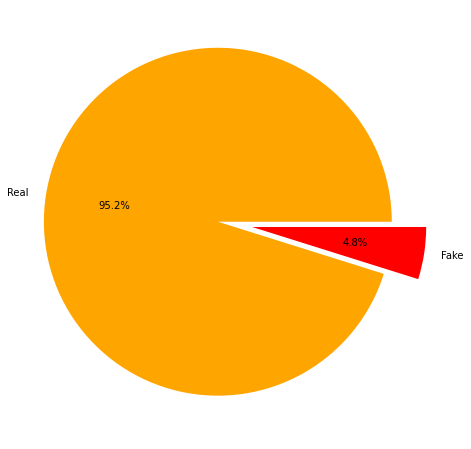

In [10]:
# Class Distribution

plt.figure(figsize=(13, 8))
labels = ['Real', 'Fake']
explode = [.1, .1]
mycolors = ['Orange', 'Red']
sizes = data['fraudulent'].value_counts().values

plt.pie(x = sizes, explode = explode, labels = labels, colors = mycolors, autopct = "%1.1f%%")

In [11]:
data['department'].nunique()

1337

In [12]:
## Fill the missing values
data.fillna(' ', inplace = True)

In [13]:
data.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

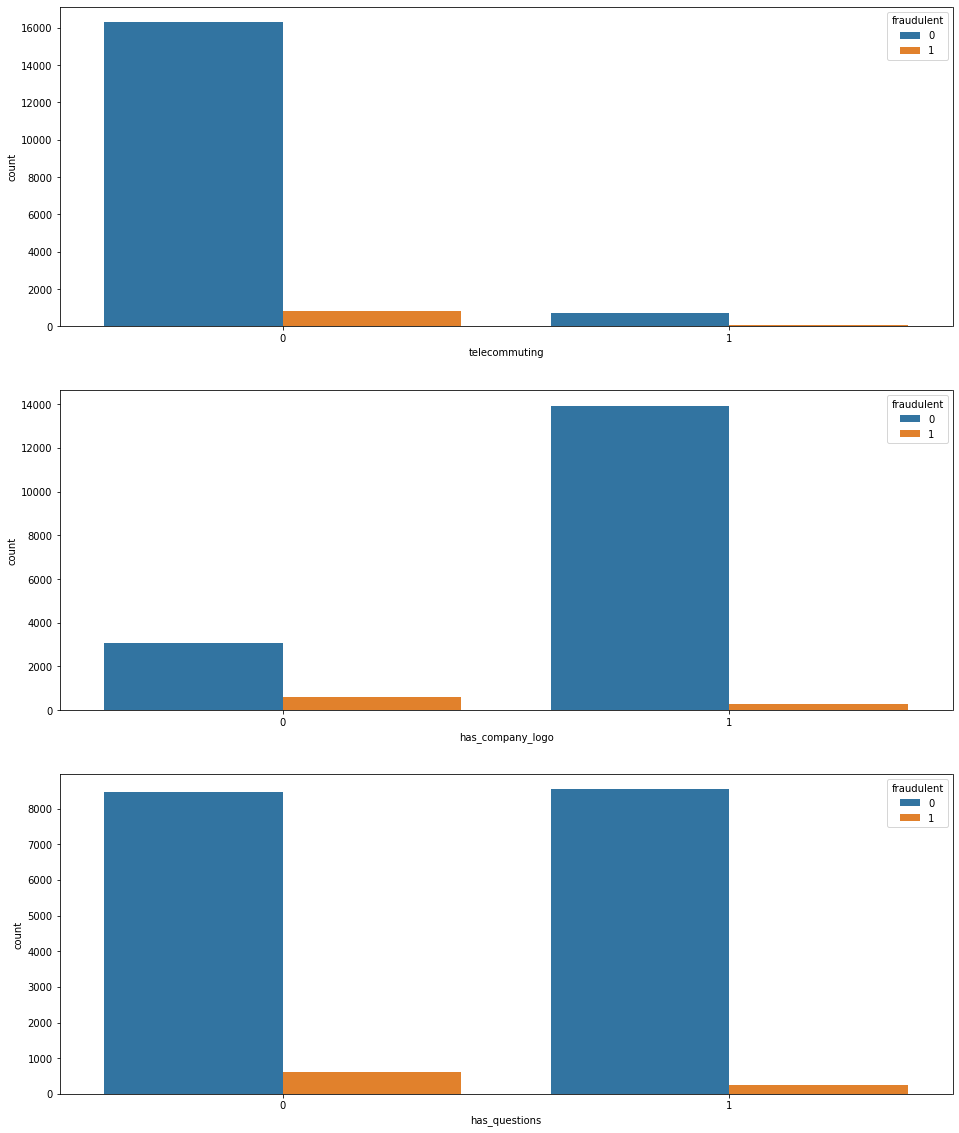

In [14]:
# Analyze the relation of telecommunicating, company logo, and has questions with fraudulent

fig, ax = plt.subplots(3, 1, figsize = (16, 20))
sns.countplot(x = 'telecommuting', hue = 'fraudulent', data = data, ax = ax[0])
sns.countplot(x = 'has_company_logo', hue = 'fraudulent', data = data, ax = ax[1])
sns.countplot(x = 'has_questions', hue = 'fraudulent', data = data, ax = ax[2])

In [15]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [16]:
data['employment_type'].value_counts()

Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

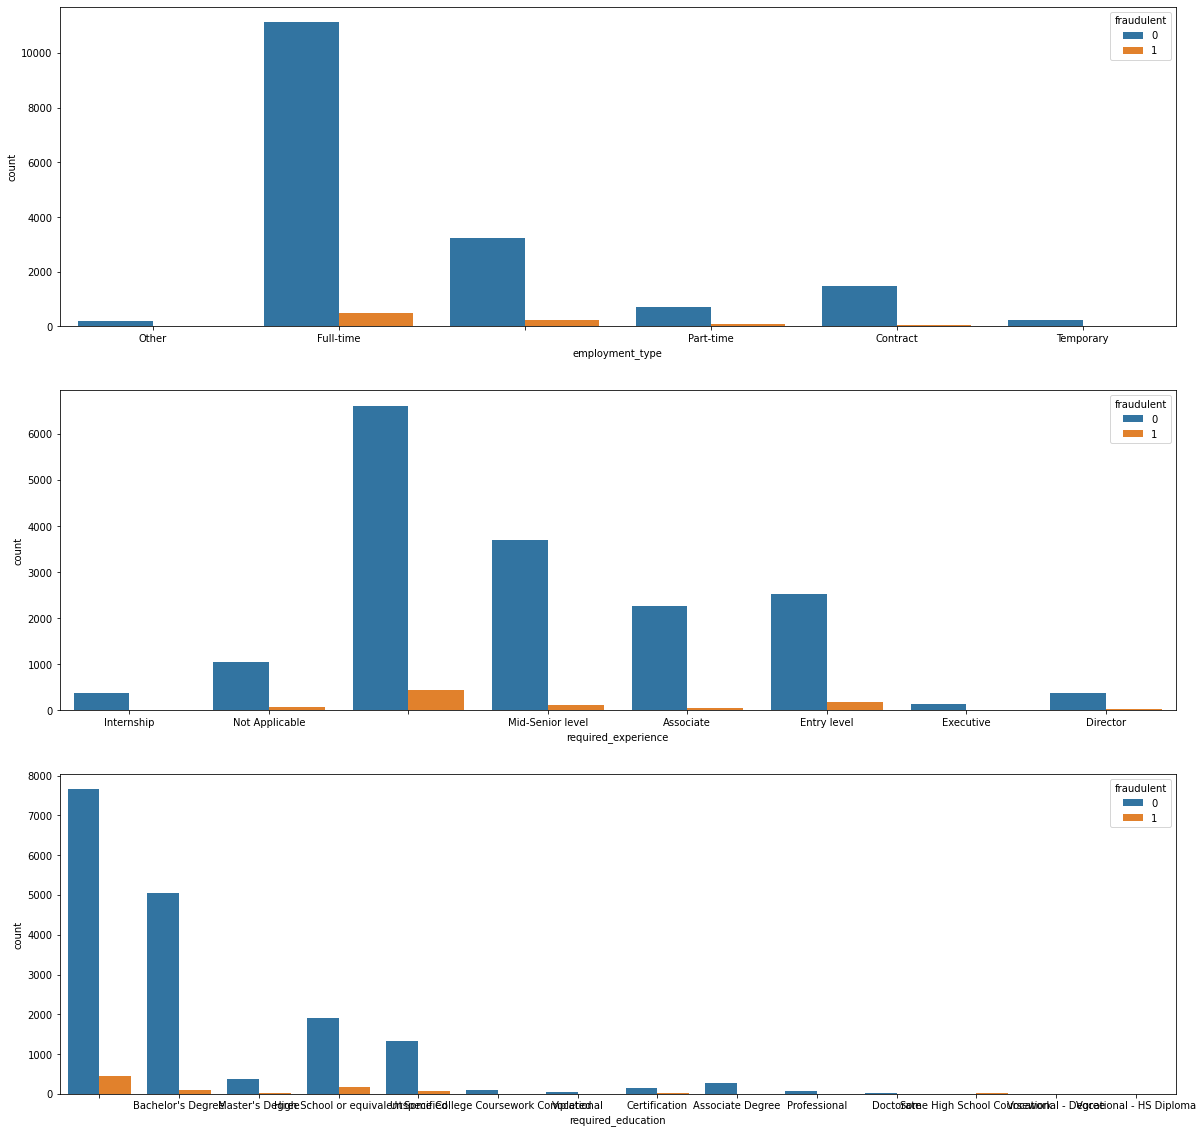

In [17]:
fig, ax = plt.subplots(3, 1, figsize = (20, 20))
sns.countplot(x = 'employment_type', hue = 'fraudulent', data = data, ax = ax[0])
sns.countplot(x = 'required_experience', hue = 'fraudulent', data = data, ax = ax[1])
sns.countplot(x = 'required_education', hue = 'fraudulent', data = data, ax = ax[2])

In [18]:
# Analyze the relation between Job title and Fraudulent job post

data[data.fraudulent == 1].title.value_counts()[:15]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Agency Sales Managers $150-$175,000/yr                                   9
 Payroll Data Entry Clerk Position - Earn $100-$200 Daily                6
Lawn and Maintenance Cont

In [19]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [20]:
## String Concatenation

data['Text'] = data['title']+' '+data['department']+' '+data['description']+' '+data['function']+' '+data['industry']+' '+data['location']+' '+data['required_education']+' '+data['benefits']+' '+data['company_profile']+' '+data['required_experience']+' '+data['requirements']+' '+data['title']

In [21]:
data.drop(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function'], axis = 1, inplace = True)

In [22]:
data.head()

,fraudulent,Text
0,0,"Marketing Intern Marketing Food52, a fast-grow..."
1,0,Customer Service - Cloud Video Production Succ...
2,0,Commissioning Machinery Assistant (CMA) Our ...
3,0,Account Executive - Washington DC Sales THE CO...
4,0,Bill Review Manager JOB TITLE: Itemization R...


In [23]:
data.Text[3]

"Account Executive - Washington DC Sales THE COMPANY: ESRI – Environmental Systems Research InstituteOur passion for improving quality of life through geography is at the heart of everything we do.\xa0 Esri’s geographic information system (GIS) technology inspires and enables governments, universities and businesses worldwide to save money, lives and our environment through a deeper understanding of the changing world around them.Carefully managed growth and zero debt give Esri stability that is uncommon in today's volatile business world.\xa0 Privately held, we offer exceptional benefits, competitive salaries, 401(k) and profit-sharing programs, opportunities for personal and professional growth, and much more.THE OPPORTUNITY: Account ExecutiveAs a member of the Sales Division, you will work collaboratively with an account team in order to sell and promote adoption of Esri’s ArcGIS platform within an organization. As part of an account team, you will be responsible for facilitating th

## Data - Preprocessing

#### Removing Punctuation

In [24]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [25]:
data['Text'] = data['Text'].apply(remove_punc)

In [26]:
data.Text[3]

'Account Executive  Washington DC Sales THE COMPANY ESRI – Environmental Systems Research InstituteOur passion for improving quality of life through geography is at the heart of everything we do\xa0 Esri’s geographic information system GIS technology inspires and enables governments universities and businesses worldwide to save money lives and our environment through a deeper understanding of the changing world around themCarefully managed growth and zero debt give Esri stability that is uncommon in todays volatile business world\xa0 Privately held we offer exceptional benefits competitive salaries 401k and profitsharing programs opportunities for personal and professional growth and much moreTHE OPPORTUNITY Account ExecutiveAs a member of the Sales Division you will work collaboratively with an account team in order to sell and promote adoption of Esri’s ArcGIS platform within an organization As part of an account team you will be responsible for facilitating the development and execu

#### Remove Numbers, Characters and anything else except alphabets

In [27]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

In [28]:
data['Text'] = data['Text'].apply(remove_noise)

In [29]:
data.Text[3]

'Account Executive  Washington DC Sales THE COMPANY ESRI   Environmental Systems Research InstituteOur passion for improving quality of life through geography is at the heart of everything we do  Esri s geographic information system GIS technology inspires and enables governments universities and businesses worldwide to save money lives and our environment through a deeper understanding of the changing world around themCarefully managed growth and zero debt give Esri stability that is uncommon in todays volatile business world  Privately held we offer exceptional benefits competitive salaries    k and profitsharing programs opportunities for personal and professional growth and much moreTHE OPPORTUNITY Account ExecutiveAs a member of the Sales Division you will work collaboratively with an account team in order to sell and promote adoption of Esri s ArcGIS platform within an organization As part of an account team you will be responsible for facilitating the development and execution o

#### Remove Stopwords

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords

In [32]:
sw = stopwords.words('english')

In [33]:
len(sw)

179

In [34]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [35]:
data['Text'] = data['Text'].apply(remove_sws)

In [36]:
data.Text[3]

'account executive washington dc sales company esri environmental systems research instituteour passion improving quality life geography heart everything esri geographic information system gis technology inspires enables governments universities businesses worldwide save money lives environment deeper understanding changing world around themcarefully managed growth zero debt give esri stability uncommon todays volatile business world privately held offer exceptional benefits competitive salaries k profitsharing programs opportunities personal professional growth much morethe opportunity account executiveas member sales division work collaboratively account team order sell promote adoption esri arcgis platform within organization part account team responsible facilitating development execution set strategies defined portfolio accounts executing strategies utilize experience enterprise sales help customers leverage geospatial information technology achieve business goals specifically pro

#### Lemmatization

In [37]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [38]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [39]:
data['Text'] = data['Text'].apply(lemma)

## Plot the Word Cloud

In [40]:
real_post = data[data.fraudulent == 0].Text
fake_post = data[data.fraudulent == 1].Text

In [41]:
real_post

0        marketing intern marketing food fastgrowing ja...
1        customer service cloud video production succes...
2        commissioning machinery assistant cma client l...
3        account executive washington dc sale company e...
4        bill review manager job title itemization revi...
                               ...                        
17875    account director distribution sale case first ...
17876    payroll accountant accounting payroll accounta...
17877    project cost control staff engineer cost contr...
17878    graphic designer nemsia studio looking experie...
17879    web application developer engineering wevend a...
Name: Text, Length: 17014, dtype: object

### Common Words in Real Job Post

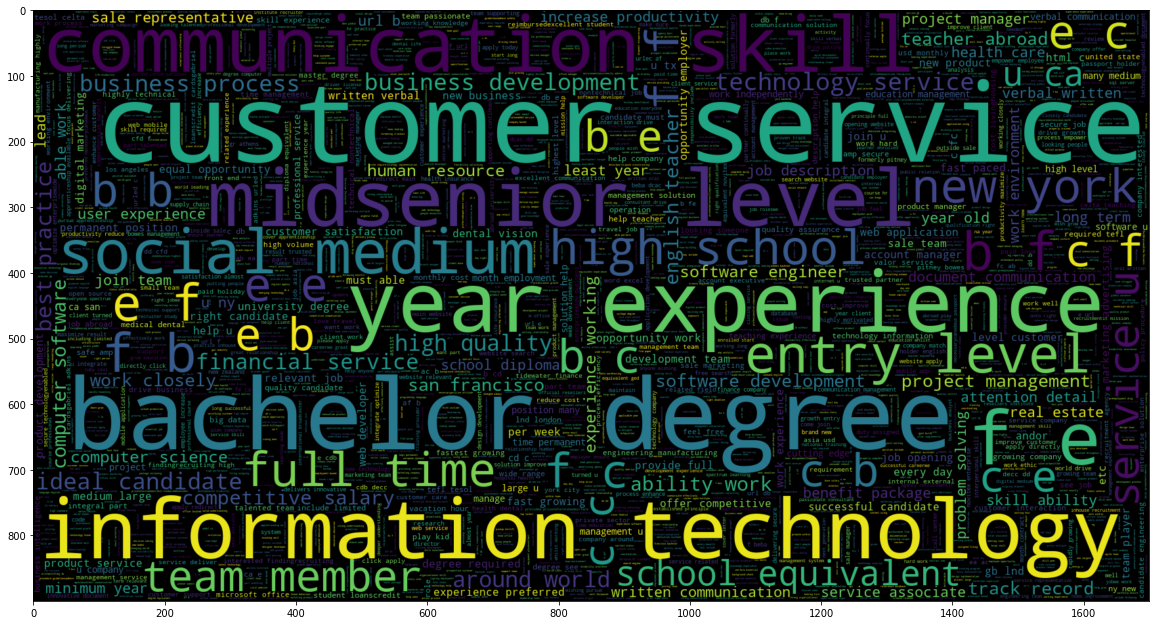

In [89]:
from wordcloud import WordCloud
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(real_post))
plt.imshow(wc, interpolation='bilinear')

### Common Words in Fake Job Post

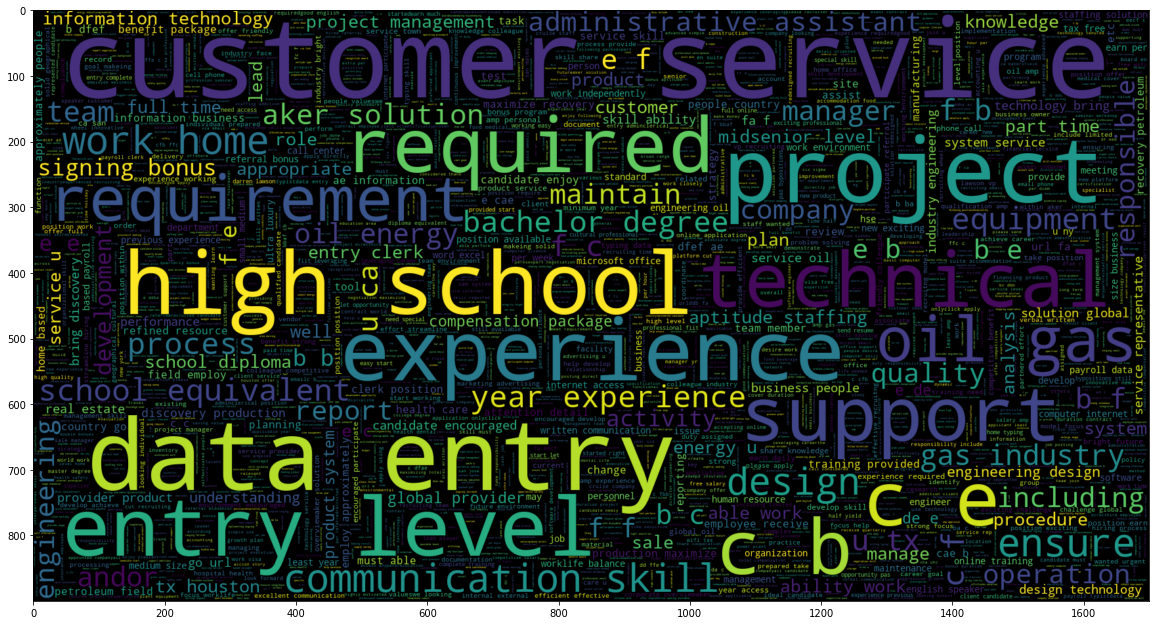

In [90]:
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(fake_post))
plt.imshow(wc, interpolation='bilinear')

## Feature Extraction

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(max_features = 2000)

# Bag of Word Model

In [43]:
X = cv.fit_transform(data['Text']).toarray()
y = data['fraudulent']

In [44]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
X = pd.DataFrame(X)

In [46]:
X

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,0,0
17876,1,0,2,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
17877,0,0,0,1,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
17878,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Balancing the Data

In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 24)

In [48]:
X_sm, y_sm = sm.fit_resample(X, y)

In [49]:
## Data Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 32)

## Model Building & Evaluation

In [50]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [51]:
# Fit the data

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
# Make a prediction

y_pred = dt.predict(X_test)

In [53]:
# Evaluation

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [54]:
# Accuracy Score

accuracy_score(y_test, y_pred)

0.9766382603585072

In [55]:
#F1-score

f1_score(y_test, y_pred)

0.9766827980642323

In [56]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [58]:
# Fit the data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# Make a prediction

y_pred_rf = rf.predict(X_test)

In [60]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3415
           1       0.97      0.98      0.98      3391

    accuracy                           0.98      6806
   macro avg       0.98      0.98      0.98      6806
weighted avg       0.98      0.98      0.98      6806

